# **타이타닉 탑승자 데이터 분석 및 생존확률 예측**

라이브러리

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# 경고 표시 제거
import warnings
warnings.filterwarnings(action='ignore')

데이터 불러오기

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
train.head(n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test.head(n=10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [ ]:
print(train.describe())

       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]


결측치 확인

In [ ]:
print(train.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [ ]:
print(test.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


Age 결측치 채우기, 여기서 Age의 결측치는 중위수로 대체

In [ ]:
train['Age'].fillna(train['Age'].median(), inplace=True)
test['Age'].fillna(test['Age'].median(), inplace=True)

Embarked 결측치 채우기, 여기서 Embarked의 결측치는 최빈값으로 대체

In [ ]:
train['Embarked'].value_counts()

train['Embarked'].fillna('S', inplace=True)
test['Embarked'].fillna('S', inplace=True)

# 데이터 분석

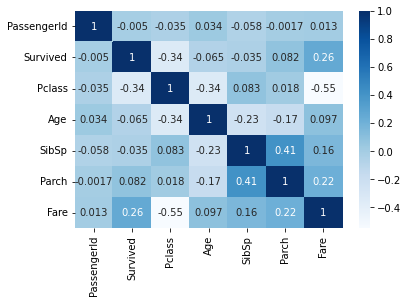

In [ ]:
sns.heatmap(train.corr(), annot=True, cmap='Blues')
plt.show()

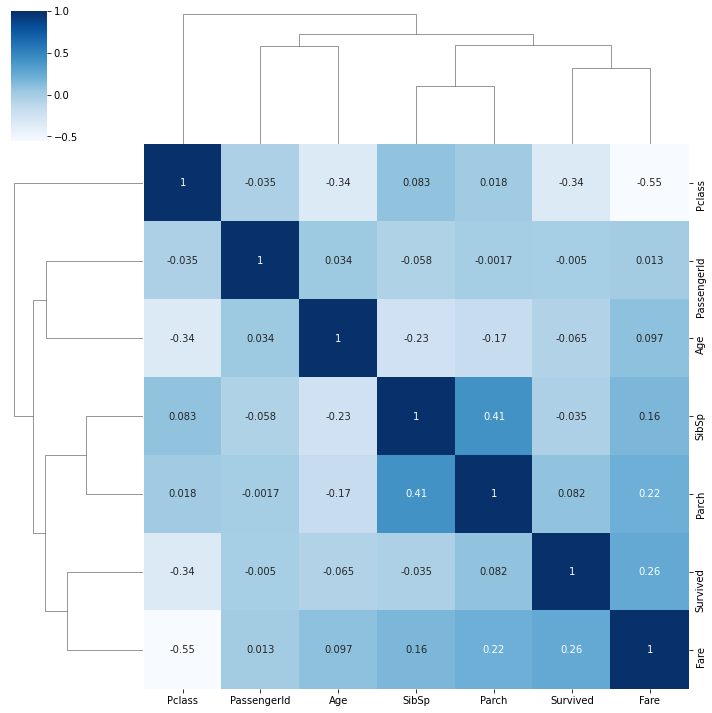

In [ ]:
sns.clustermap(train.corr(), annot=True, cmap='Blues')
plt.show()

1. 성별에 따른 생존률

Survival Rate of male passengers in Titanic: 0.18890814558058924
Survival Rate of female passengers in Titanic: 0.7420382165605095


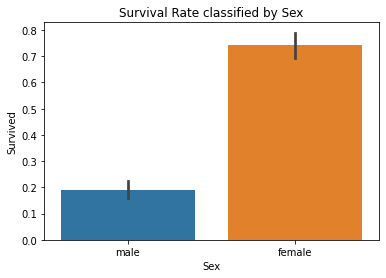

In [ ]:
Rate_male = train[train['Sex']=='male']['Survived'].mean()
Rate_female = train[train['Sex']=='female']['Survived'].mean()

print("Survival Rate of male passengers in Titanic: {}".format(Rate_male))
print("Survival Rate of female passengers in Titanic: {}".format(Rate_female))

sns.barplot(train['Sex'], train['Survived'])
plt.title("Survival Rate classified by Sex")
plt.show()

남성의 생존률 평균은 약 18.89%, 여성의 생존률 평균은 약 74.20%이므로
탑승객의 성별이 여성일 경우 생존률이 더 높다고 볼 수 있음.

2. 좌석등급에 따른 생존률

Survival Rate of first class passengers in Titanic: 0.6296296296296297
Survival Rate of second class passengers in Titanic: 0.47282608695652173
Survival Rate of third class passengers in Titanic: 0.24236252545824846


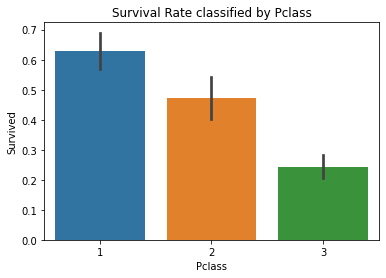

In [ ]:
Rate_first = train[train['Pclass']==1]['Survived'].mean()
Rate_second = train[train['Pclass']==2]['Survived'].mean()
Rate_third = train[train['Pclass']==3]['Survived'].mean()

print('Survival Rate of first class passengers in Titanic: {}'.format(Rate_first))
print('Survival Rate of second class passengers in Titanic: {}'.format(Rate_second))
print('Survival Rate of third class passengers in Titanic: {}'.format(Rate_third))

sns.barplot(train["Pclass"], train["Survived"])
plt.title("Survival Rate classified by Pclass")
plt.show()

좌석등급이 높을수록(숫자가 낮을수록) 생존할 가능성이 더 높아지는 것을 알 수 있음.

3. 나이에 따른 생존률

[28.29143274853801, 30.028233151183972]


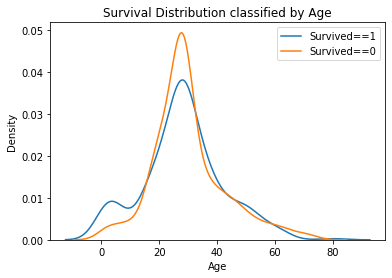

In [ ]:
Rate_Age_alive = train[train['Survived']==1]['Age'].mean()
Rate_Age_dead = train[train['Survived']==0]['Age'].mean()

print([Rate_Age_alive, Rate_Age_dead])

sns.kdeplot(train[train['Survived']==1]['Age'])
sns.kdeplot(train[train['Survived']==0]['Age'])
plt.legend(["Survived==1", "Survived==0"])
plt.title("Survival Distribution classified by Age")
plt.show()

The average of people age who survived in Titanic: 28.29143274853801
28.0
0    28.0
dtype: float64


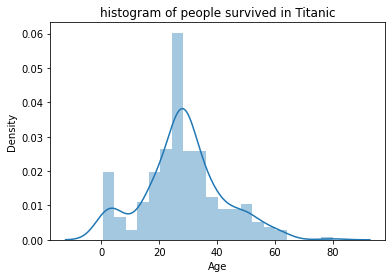

In [ ]:
print('The average of people age who survived in Titanic: {}'.format(Rate_Age_alive))
print(train[train['Survived']==1]['Age'].median())
print(train[train['Survived']==1]['Age'].mode())

sns.distplot(train[train['Survived']==1]['Age'])
plt.title('histogram of people survived in Titanic')
plt.show()

The average of people age who survived in Titanic: 30.028233151183972
28.0
0    28.0
dtype: float64


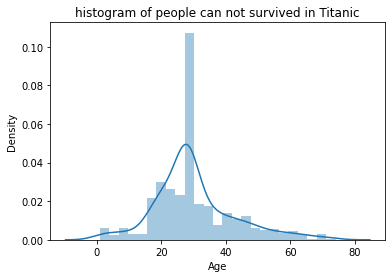

In [ ]:
print('The average of people age who survived in Titanic: {}'.format(Rate_Age_dead))
print(train[train['Survived']==0]['Age'].median())
print(train[train['Survived']==0]['Age'].mode())

sns.distplot(train[train['Survived']==0]['Age'])
plt.title('histogram of people can not survived in Titanic')
plt.show()

살아남은 사람들의 평균 연령은 28.3세, 살아남지 못한 사람들의 평균 연령은 30.0세이다.
나이가 어릴 수록 생존률이 더 높아진다고 볼 수 있음.

4. 출항지에 따른 생존률

In [ ]:
Rate_S = train[train['Embarked']=='S']['Survived'].mean()
Rate_C = train[train['Embarked']=='C']['Survived'].mean()
Rate_Q = train[train['Embarked']=='Q']['Survived'].mean()

print([Rate_S, Rate_C, Rate_Q])

[0.33900928792569657, 0.5535714285714286, 0.38961038961038963]


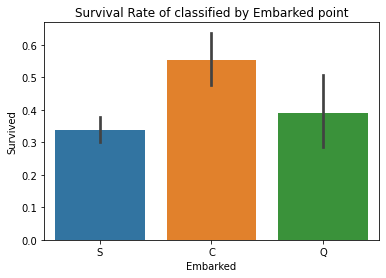

In [ ]:
sns.barplot(train['Embarked'], train['Survived'])
plt.title("Survival Rate of classified by Embarked point")
plt.show()

위의 그래프에서 S:Southampton, C:Cherbourg, Q:Queenstown을 의미
Cherbourg에서 승선한 탑승객의 생존률이 제일 높은 것을 알 수 있음.

# 모델 학습을 위한 준비
- 다음 4가지 특성을 이용: Pclass, Sex, Age, Embarked

In [ ]:
X_train = train.drop(["PassengerId","Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Survived"],axis=1)
Y_train = train["Survived"]
X_test  = test.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Fare", "Cabin"],axis=1).copy()

X_test.head(n=10)

,Pclass,Sex,Age,Embarked
0,3,male,34.5,Q
1,3,female,47.0,S
2,2,male,62.0,Q
3,3,male,27.0,S
4,3,female,22.0,S
5,3,male,14.0,S
6,3,female,30.0,Q
7,2,male,26.0,S
8,3,female,18.0,C
9,3,male,21.0,S


# 다양한 모델 학습을 위한 Mapping

Sex mapping - male:0, female:1

In [ ]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

Embarked mapping - S:0, C:1, Q:2

In [ ]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

# 다양한 모델을 통한 예측

Logistic Regression 모델

In [ ]:
logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

print("Prediction Score using LogisticRegression model: {}".format(logreg.score(X_train, Y_train)))

Prediction Score using LogisticRegression model: 0.7901234567901234


SVC 모델

In [ ]:
svc = SVC()

svc.fit(X_train, Y_train)

Y_pred = svc.predict(X_test)

print("Prediction Score using SVC model: {}".format(svc.score(X_train, Y_train)))

Prediction Score using SVC model: 0.632996632996633


RandomForest 모델

In [ ]:
random_forest = RandomForestClassifier()

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print("Prediction Score using RandomForest model: {}".format(random_forest.score(X_train, Y_train)))

Prediction Score using RandomForest model: 0.9001122334455668


KNN 모델

In [ ]:
knn = KNeighborsClassifier()

knn.fit(X_train, Y_train)

Y_pred = knn.predict(X_test)

print("Prediction Score using KNN model: {}".format(knn.score(X_train, Y_train)))

Prediction Score using KNN model: 0.835016835016835


예측결과 저장 및 제출

In [ ]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('PredictionTitanic.csv', index=False)